# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

***Importing important packages and loading the training and test data and checking the number of images***

In [1]:
#############################
### All important imports ###
#############################

import pickle
import numpy as np
import tensorflow as tf
import random
import csv
import os
from PIL import Image
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

***Loading data below from pickled data which will be using for modelling. We are having three types of dataset - Training data, Validation data and test data. Details can be found below***

In [2]:
############################
##### Load pickled data ####
############################

training_file = '../data/train.p'
validation_file='../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

***Printing train, test, valid and label of the data***

In [3]:
print(len(y_train))
print(len(y_valid))
print(len(y_test))
print(X_test.shape)
print(test['labels'])

34799
4410
12630
(12630, 32, 32, 3)
[16  1 38 ...,  6  7 10]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

(32, 32, 3)

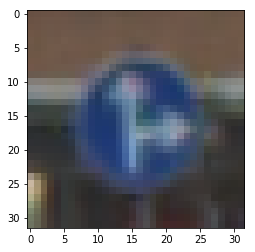

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(X_train[900])

X_train[0].shape

***Getting the values Number of training examples, Number of testing examples, Image data shape and Number of classes***

In [5]:
import numpy as np

#####################################
#### Number of training examples ####
#####################################

n_train = len(X_train)

####################################
### Number of validation examples###
####################################

n_validation = len(X_valid)

##################################
### Number of testing examples ###
##################################

n_test = len(X_test)

######################################
### shape of an traffic sign image ###
######################################

image_shape = X_train[0].shape

######################################################
### Unique classes/labels there are in the dataset ###
######################################################

n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of Validation exaples", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of Validation exaples 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

***Time to analyise the data by visulazing it, visualization can be seen below***

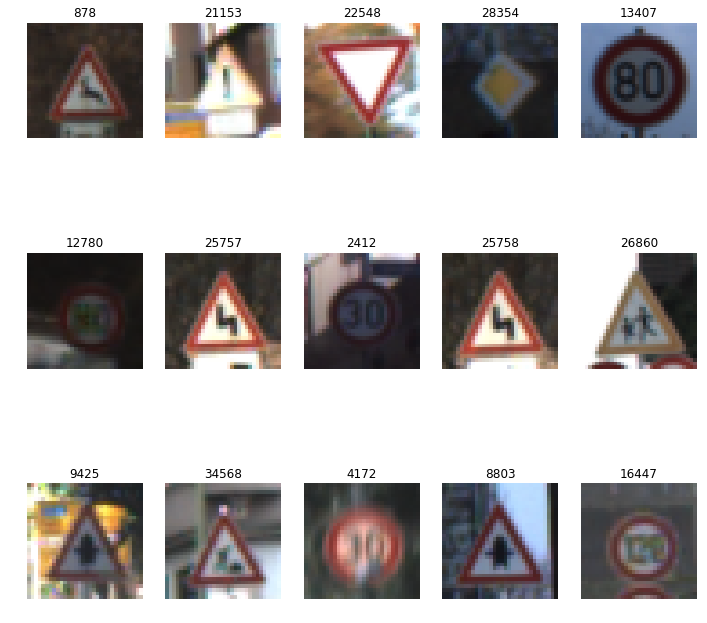

In [6]:
##########################################################
###### Visualizations will be shown in the notebook ######
##########################################################

import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(12,12))
for i in range(15):
    plt.subplot(3,5,i+1)
    index = np.random.randint(0, n_train)
    image = X_train[index]
    plt.axis('off')
    plt.imshow(image)
    plt.title(index)

***Now we will be exploring the data points available each class by plotting a histogram*** 

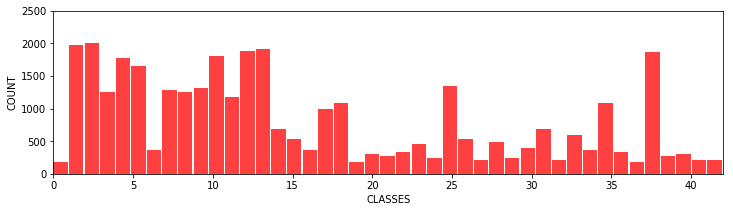

In [7]:
########################################################
###### Graph showing train dataset element count #######
########################################################

fig = plt.figure(figsize=(12,3))
plt.axis([0, 42, 0, 2500])
plt.hist(y_train, n_classes,color='red',alpha =0.75,width=0.9)
plt.xlabel('CLASSES')
plt.ylabel('COUNT')
plt.show()

**Observation by Data Visualization:** There is a significant imbalance across classes in the training set, as shown in the histogram above. Some classes have less than 200 images, while others have over 2000. This means that our model could be biased towards over-represented classes, especially when it is unsure in its predictions. We will see later how we can overcome this discrepancy using data augmentation. 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### PREPROCESSING

#### We are going to Convert RGB to Grayscale and apply Histogram equalization and Normalization

***Here, we are going to Convert to greyscale reduces the size of the dataset and in theory should improve speed of the algorithm futher down. Also, we are able to increase accuracy slightly using gray scale as per paper http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf.  Histogram equalization was another techique that I used which according several articles online, helps in improving image contrast and this again in theory helps in achieving higher accuracy.***

Text(0.5,1,'AFTER PRE-PROCESING')

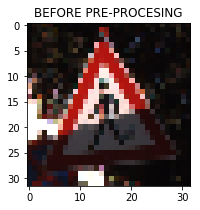

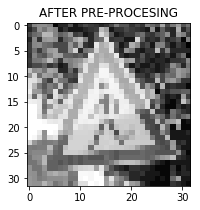

In [9]:
####################################
##### Preprocessing the images #####
####################################

import random
import cv2
%matplotlib inline

index = random.randint(0,n_test)

#######################################################################
######## Print an image from the dataset before preprocessing #########
#######################################################################

plt.figure(figsize=(3,3))
plt.imshow(X_test[index])
plt.title('BEFORE PRE-PROCESING')

###############################################################
######## Convert to grayscale and  histogram equalize #########
###############################################################

def color_to_gray(data):
   
    gray = np.ndarray((data.shape[0], 32, 32, 1), dtype=np.uint8)
    
    for i, image in enumerate(data):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.equalizeHist(image) 
        image = np.expand_dims(image, axis=2)
        gray[i] = image
    return gray

X_train_gray_equalized = color_to_gray(X_train)
X_test_gray_equalized = color_to_gray(X_test)

###################################################################
####### Print an image from the dataset after preprocessing #######
###################################################################

plt.figure(figsize=(3,3))
plt.imshow(X_test_gray_equalized[index].squeeze(),cmap = 'gray')
plt.title('AFTER PRE-PROCESING')

In [10]:
print("Original shape:", X_train.shape)
print("Pre-Processed shape:", X_train_gray_equalized.shape)
X_train = X_train_gray_equalized
X_test = X_test_gray_equalized

Original shape: (34799, 32, 32, 3)
Pre-Processed shape: (34799, 32, 32, 1)


***Generating the additional and added data***

In [11]:
###################################################
##### Append generated data to original data ######
###################################################

min_samples = 1200
generated_signs = []
generated_labels = []

sign_count = [y_train.tolist().count(i) for i in range(n_classes)]

for class_index in range(len(sign_count)):
    class_count = sign_count[class_index]
    augment = round(min_samples / class_count)

    if augment <= 1:
        continue
    
    for feature, label in zip(X_train, y_train):
        if class_index == label:
            for i in range(augment):
                generated_signs.append(feature)
                generated_labels.append(label)

print("Additional data was generated and added")                

####################################################
###### append generated data to original data ######
####################################################

X_train_augmented = np.append(np.array(X_train), np.array(generated_signs), axis=0)
y_train_augmented = np.append(np.array(y_train), np.array(generated_labels), axis=0)

Additional data was generated and added


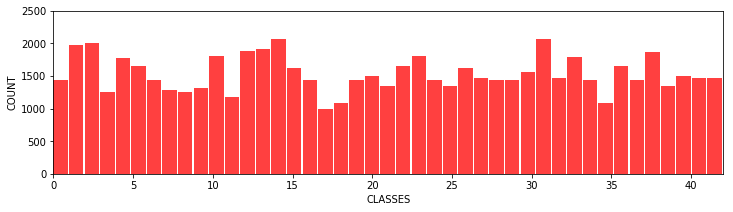

In [12]:
#######################################################################
##### Graph showing train dataset element count after augmenting ######
#######################################################################

fig = plt.figure(figsize=(12,3))
plt.axis([0, 42, 0, 2500])
plt.hist(y_train_augmented, n_classes,color='red',alpha =0.75,width=0.9)
plt.xlabel('CLASSES')
plt.ylabel('COUNT')
plt.show()

In [13]:
from sklearn.utils import shuffle

X_train = X_train_augmented
y_train = y_train_augmented

X_train, y_train = shuffle(X_train, y_train)

In [14]:
###################################################################################
##### Split the traning dataset into training and validation set 80/20 split ######
###################################################################################

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)
print("Training size:", len(X_train), " labels size:", len(y_train))
print("Validation size:", len(X_validation), " labels size:", len(y_validation))
print("Test size:", len(X_test), " labels size:", len(y_test))

Training size: 52845  labels size: 52845
Validation size: 13212  labels size: 13212
Test size: 12630  labels size: 12630


**NOTE : I splited the test set by 80/20 ratio into Test and Validation sets respectively.I have generated additional data because even after tweaking my network (lowering learning rates, increasing size of network and reducing learning rates etc.) My validation accuracy was not good. We can observe that few of the classes in the traning dataset didn't have enough images and this could not get better performance. Hence, data augmentation is important. I didnt do anything fancy, just identified the classes having below 1200 images and just made copies of them and added them back to the traning dataset.**



### Model Architecture


**Note :** I'm running a slightly tweaked version of the LeNet lab solution with Adam Optimizer. My Hyper Paramaters are as follows:

No: of Epochs = 40 Batch Size = 128 mu = 0 sigma = 0.1 Learning rate = 0.0001

In [15]:
######################################
### Define your architecture here ####
######################################

EPOCHS = 40
BATCH_SIZE = 128
mu = 0
sigma = 0.1
rate = 0.0001

I am implementing LeNet lab solution and tweked it as follows:

**Layer 1:** Convolutional. Input = 32x32x1. Output = 28x28x16. Relu activation was used. Used Max pooling with stride 2

**Layer 2:** Convolutional. Input = 14x14x16 Output = 10x10x32. Relu activation was used. Used Max pooling with stride 2

Then three fully connected layers were used

**Layer 3:** Fully Connected. Input = 800. Output = 128. Added Dropout with keep prob 0.8

**Layer 4:** Fully Connected. Input = 128. Output = 64.

**Layer 5:** Fully Connected. Input = 64. Output = 43.

In [16]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf

keep_prob = tf.placeholder(tf.float32)

def LeNet(x):    

###############################################################################################
################## Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x16 #################
###############################################################################################
    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

##############################################################################################
################################ Applying RELU Activation ####################################
##############################################################################################
    
    conv1 = tf.nn.relu(conv1)

##############################################################################################
####################### Pooling. Input = 28x28x16. Output = 14x14x16 #########################
##############################################################################################
    
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

##############################################################################################    
################### Layer 2: Convolutional. Input = 14x14x16 Output = 10x10x32 ###############
##############################################################################################
    
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
###############################################################################################    
################################## Applying RELU Activation ###################################
###############################################################################################
    
    conv2 = tf.nn.relu(conv2)

###############################################################################################
############################# Pooling. Input = 10x10x32. Output = 5x5x32 ######################
###############################################################################################
    
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

##############################################################################################
####################### Flatten. Input = 5x5x32. Output = 800 ################################
##############################################################################################
    
    fc0   = flatten(conv2)

##############################################################################################
########################### Layer 3: Fully Connected. Input = 800. Output = 128 ##############
##############################################################################################
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 128), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(128))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

#############################################################################################
################################## Adding Dropout ###########################################
#############################################################################################
    
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)
    
#############################################################################################
######################### Layer 4: Fully Connected. Input = 128. Output = 64 ################
#############################################################################################
    
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(128, 64), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(64))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
############################################################################################# 
######################## Layer 5: Fully Connected. Input = 64. Output = 43 ##################
#############################################################################################
    
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(64, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [17]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [19]:
####################################################################################
############################ Training the your model################################
####################################################################################

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [20]:
import tensorflow as tf
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [21]:
import time
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        start_time =  time.time()
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Time Taken = {:.2f} sec".format(time.time() - start_time))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.045
Time Taken = 4.33 sec

EPOCH 2 ...
Validation Accuracy = 0.069
Time Taken = 3.56 sec

EPOCH 3 ...
Validation Accuracy = 0.090
Time Taken = 3.58 sec

EPOCH 4 ...
Validation Accuracy = 0.101
Time Taken = 3.52 sec

EPOCH 5 ...
Validation Accuracy = 0.112
Time Taken = 3.55 sec

EPOCH 6 ...
Validation Accuracy = 0.128
Time Taken = 3.53 sec

EPOCH 7 ...
Validation Accuracy = 0.155
Time Taken = 3.59 sec

EPOCH 8 ...
Validation Accuracy = 0.183
Time Taken = 3.54 sec

EPOCH 9 ...
Validation Accuracy = 0.268
Time Taken = 3.58 sec

EPOCH 10 ...
Validation Accuracy = 0.308
Time Taken = 3.58 sec

EPOCH 11 ...
Validation Accuracy = 0.349
Time Taken = 3.60 sec

EPOCH 12 ...
Validation Accuracy = 0.381
Time Taken = 3.55 sec

EPOCH 13 ...
Validation Accuracy = 0.432
Time Taken = 3.56 sec

EPOCH 14 ...
Validation Accuracy = 0.484
Time Taken = 3.54 sec

EPOCH 15 ...
Validation Accuracy = 0.530
Time Taken = 3.57 sec

EPOCH 16 ...
Validation Accuracy = 0

In [22]:
# Testing Final Model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.871


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

I've only used 6 candidate images in total. All of them have been printed above. All the images are very similar to the ones the network has been trained with already. So it should be able to perform well.

In [23]:
##########################################################################################
######################### Loading the images and plot them here ##########################
##########################################################################################

import os
import matplotlib.image as mpimg

my_images = np.array([cv2.resize(mpimg.imread("My_images/" + imageName), (32, 32)) for imageName in os.listdir("My_images")])

#############################################################################################
##### Call previously defined function to convet to gray and histogram equalize images ######
#############################################################################################

my_images_gray_equalized =  color_to_gray(my_images)

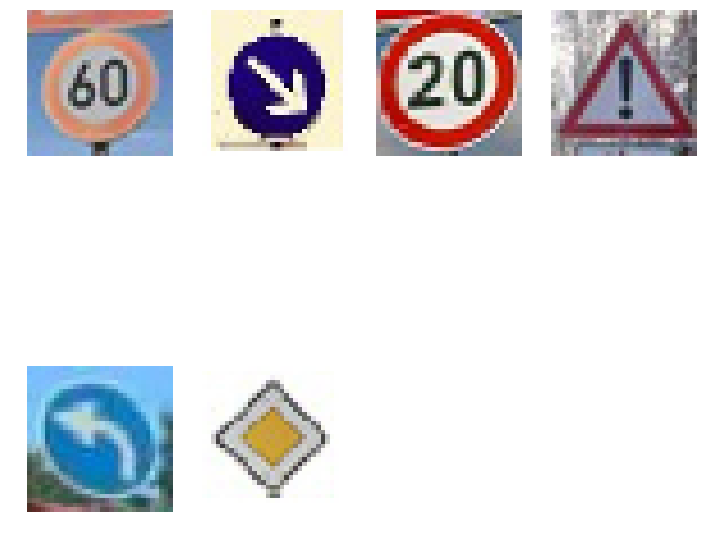

In [24]:
import matplotlib.image as mpimg

plt.figure(figsize=(12,12))
for i in range(6):
    plt.subplot(2,4,i+1)
    image = my_images[i]
    plt.axis('off')
    plt.imshow(image)

### Predict the Sign Type for Each Image

Time to run the predictions here and use the model to output the prediction for each image and make sure to pre-process the images with the same pre-processing pipeline used earlier.

INFO:tensorflow:Restoring parameters from ./lenet


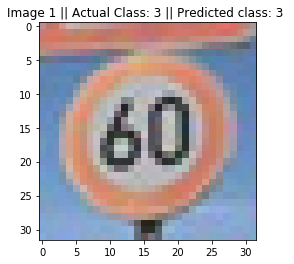

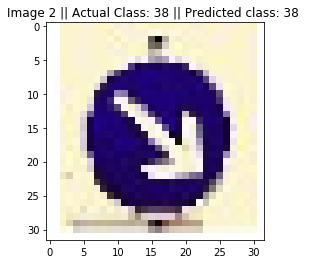

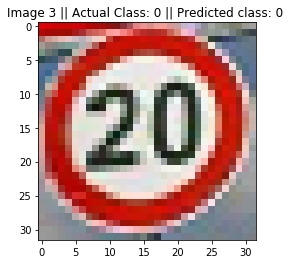

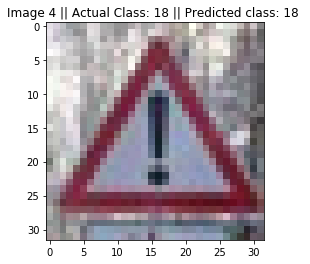

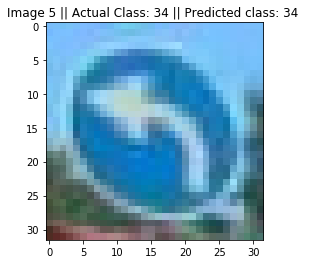

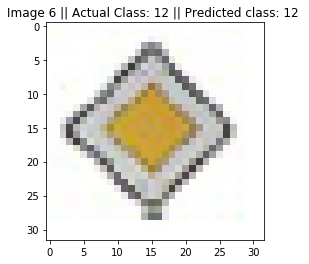

In [25]:
%matplotlib inline

##################################################################################################
##################### Predict the Sign Type for Each Image #######################################
##################################################################################################

my_labels = [3, 38, 0, 18, 34, 12 ]

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_probabilites = sess.run(softmax_logits, feed_dict={x: my_images_gray_equalized, keep_prob: 1.0})
    top_k = sess.run(top_k, feed_dict={x: my_images_gray_equalized, keep_prob: 1.0})

for i in range(len(softmax_probabilites)):
#     print('Image',i, '|| Actual Class: ',my_labels[i],'|| Predicted class: ',np.argmax(softmax_probabilites[i]))
    img = my_images[i]
    plt.imshow(img)
    plt.title('Image {} || Actual Class: {} || Predicted class: {} '.format(i+1,my_labels[i],np.argmax(softmax_probabilites[i])))

    plt.show()

### Analyze Performance

**When testing my network with the 6 images, the accuracy is 100%. Meaning it was able to predict  out of the 6 images correctly. This was kind of expected considering the fact that my images are very similar to the ones already the network has been trained with and they didnt have any distortions.**

In [26]:
top_k

TopKV2(values=array([[  9.99989152e-01,   5.84233430e-06,   3.32034256e-06],
       [  1.00000000e+00,   1.92836427e-10,   1.38782779e-11],
       [  6.28057659e-01,   3.59234095e-01,   1.13284132e-02],
       [  9.99996781e-01,   3.23766312e-06,   2.21929497e-09],
       [  9.99594152e-01,   2.99193052e-04,   8.01849383e-05],
       [  9.99962449e-01,   3.34442411e-05,   1.65697213e-06]], dtype=float32), indices=array([[ 3,  5,  2],
       [38,  9,  3],
       [ 0, 28, 32],
       [18, 26, 29],
       [34, 38, 28],
       [12, 40, 16]], dtype=int32))

In [27]:
######################################################################################################
############################# Calculate the accuracy for these 5 new images ##########################
######################################################################################################

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_accuracy = evaluate(my_images_gray_equalized, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy = 1.000


Top 5 Prediction :  [ 3  5  2  6 13]


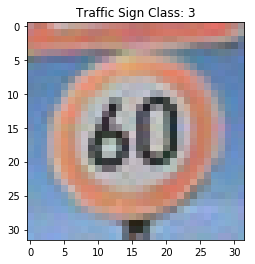

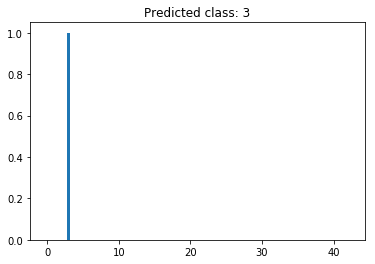


Top 5 Prediction :  [38  9  3  2 31]


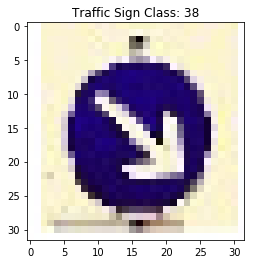

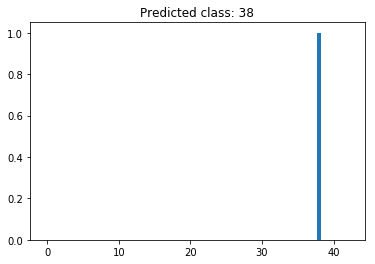


Top 5 Prediction :  [ 0 28 32  6 21]


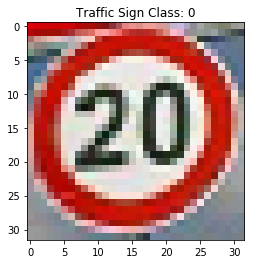

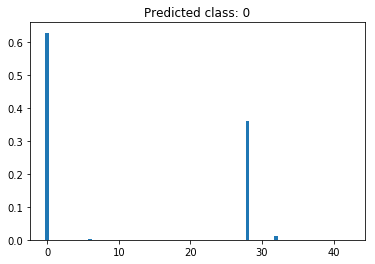


Top 5 Prediction :  [18 26 29 27 24]


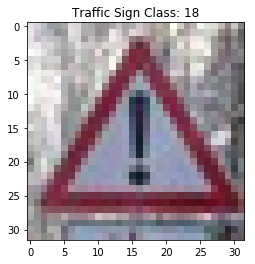

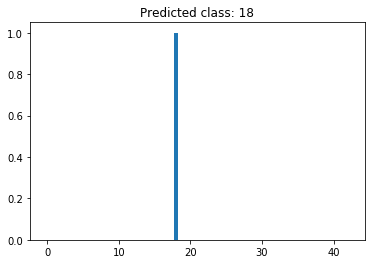


Top 5 Prediction :  [34 38 28 36 30]


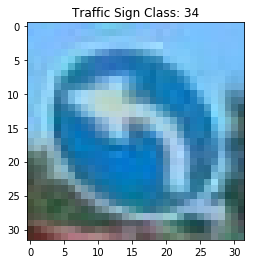

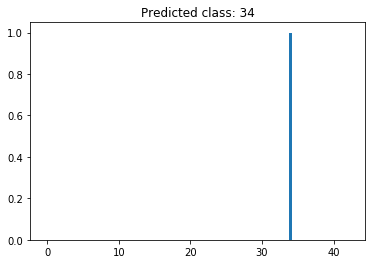


Top 5 Prediction :  [12 40 16 41 10]


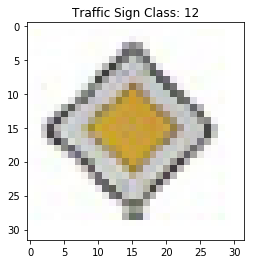

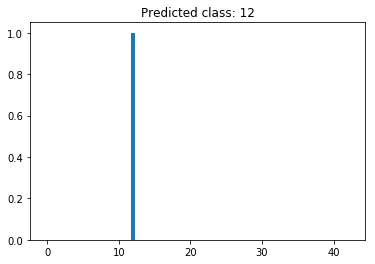

In [28]:
for i in range(softmax_probabilites.shape[0]):
    softmax = softmax_probabilites[i]
    #print(softmax)
    label = my_labels[i]
    x_range = np.arange(43)
      
    top_keys = np.argsort(softmax)[::-1][:5]
    print('Top 5 Prediction : ',top_keys)
    
    img = my_images[i]
    plt.imshow(img)
    plt.title('Traffic Sign Class: {}'.format(label))

    plt.show()
    plt.title('Predicted class: {}'.format(top_keys[0]))
    plt.bar(x_range, softmax, align='center', width=0.5)
    plt.show()
    print('========================================================')
    print()

**Output** : All images were recognized with almost 100% probability.

The softmax probability bar plots indicate that all 6 images were recognized with probability almost equal to 1. I guess, since I included images that were very similar to the ones my network was very familiar with, it had no trouble predicting it with almost 100% certainty.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [29]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.



### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [30]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")